# Load Packages

In [218]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


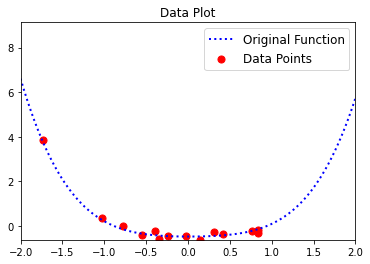

In [221]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [222]:
degree = 4
A = np.zeros((n_data, degree+1)) # Dummy initialization
A

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [223]:
np.set_printoptions(precision=3)
A = np.ones((n_data,))# Create new matrix
A = A[:, np.newaxis]
for exponent in range(1, degree+1):
  column = np.array(x_data)
  column = column[:, np.newaxis]
  for row in range(n_data):
    column[row] = column[row]**exponent
  A = np.concatenate((A, column), axis=1)
A

array([[ 1.000e+00,  7.695e-01,  5.921e-01,  4.556e-01,  3.505e-01],
       [ 1.000e+00, -5.487e-01,  3.011e-01, -1.652e-01,  9.066e-02],
       [ 1.000e+00, -3.961e-01,  1.569e-01, -6.214e-02,  2.461e-02],
       [ 1.000e+00, -3.445e-01,  1.187e-01, -4.087e-02,  1.408e-02],
       [ 1.000e+00, -1.733e+00,  3.002e+00, -5.201e+00,  9.011e+00],
       [ 1.000e+00, -1.026e+00,  1.053e+00, -1.081e+00,  1.110e+00],
       [ 1.000e+00,  8.318e-01,  6.919e-01,  5.756e-01,  4.788e-01],
       [ 1.000e+00,  4.181e-01,  1.748e-01,  7.308e-02,  3.056e-02],
       [ 1.000e+00, -7.735e-01,  5.982e-01, -4.627e-01,  3.579e-01],
       [ 1.000e+00,  1.414e-01,  1.999e-02,  2.826e-03,  3.996e-04],
       [ 1.000e+00,  3.166e-01,  1.002e-01,  3.174e-02,  1.005e-02],
       [ 1.000e+00,  8.321e-01,  6.924e-01,  5.761e-01,  4.794e-01],
       [ 1.000e+00, -2.035e-02,  4.141e-04, -8.427e-06,  1.715e-07],
       [ 1.000e+00, -2.434e-01,  5.926e-02, -1.442e-02,  3.511e-03],
       [ 1.000e+00, -2.180e+00,  4

### Print results (do not modify the following block)

In [224]:
print(A)

[[ 1.000e+00  7.695e-01  5.921e-01  4.556e-01  3.505e-01]
 [ 1.000e+00 -5.487e-01  3.011e-01 -1.652e-01  9.066e-02]
 [ 1.000e+00 -3.961e-01  1.569e-01 -6.214e-02  2.461e-02]
 [ 1.000e+00 -3.445e-01  1.187e-01 -4.087e-02  1.408e-02]
 [ 1.000e+00 -1.733e+00  3.002e+00 -5.201e+00  9.011e+00]
 [ 1.000e+00 -1.026e+00  1.053e+00 -1.081e+00  1.110e+00]
 [ 1.000e+00  8.318e-01  6.919e-01  5.756e-01  4.788e-01]
 [ 1.000e+00  4.181e-01  1.748e-01  7.308e-02  3.056e-02]
 [ 1.000e+00 -7.735e-01  5.982e-01 -4.627e-01  3.579e-01]
 [ 1.000e+00  1.414e-01  1.999e-02  2.826e-03  3.996e-04]
 [ 1.000e+00  3.166e-01  1.002e-01  3.174e-02  1.005e-02]
 [ 1.000e+00  8.321e-01  6.924e-01  5.761e-01  4.794e-01]
 [ 1.000e+00 -2.035e-02  4.141e-04 -8.427e-06  1.715e-07]
 [ 1.000e+00 -2.434e-01  5.926e-02 -1.442e-02  3.511e-03]
 [ 1.000e+00 -2.180e+00  4.750e+00 -1.035e+01  2.257e+01]]


### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [225]:
degree = 4
w_est = np.zeros((degree+1,1))
y_est = np.zeros_like(x_list)

In [226]:
from numpy.linalg import inv

In [248]:
y = np.array(y_data)
y = y[:, np.newaxis]

In [247]:
w_est = np.matmul(np.matmul(inv(np.matmul(A.T, A)), A.T), y)

In [229]:
def degree4_func(input_x):
  return w_est[0] + w_est[1] * input_x**1 + w_est[2] * input_x**2 + w_est[3] * input_x**3 + w_est[4] * input_x**4

In [246]:
for i in range(len(x_list)):
  y_est[i] = degree4_func(x_list[i])

### Print results (do not modify the following block)

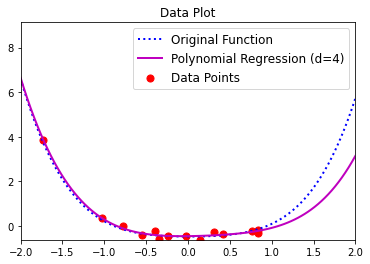

In [231]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [232]:
degree1 = 1
A1 = np.zeros((n_data, degree1+1)) 
w_est1 = np.zeros((degree1+1,1))
y_est1 = np.zeros_like(x_list)

In [233]:
def degree1_func(input_x):
  return w_est1[0] + w_est1[1] * input_x**1

In [234]:
A1 = np.ones((n_data,))# Create new matrix
A1 = A1[:, np.newaxis]
for exponent in range(1, degree1+1):
  column = np.array(x_data)
  column = column[:, np.newaxis]
  for row in range(n_data):
    column[row] = column[row]**exponent
  A1 = np.concatenate((A1, column), axis=1)

y = np.array(y_data)
y = y[:, np.newaxis]

w_est1 = np.matmul(np.matmul(inv(np.matmul(A1.T, A1)), A1.T), y)
w_est1

for i in range(len(x_list)):
  y_est1[i] = degree1_func(x_list[i])

### Print results (do not modify the following block)

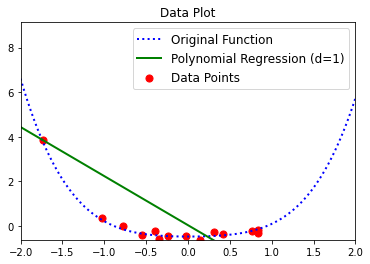

In [235]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [240]:
degree2 = 10
A2 = np.zeros((n_data, degree2+1))
w_est2 = np.zeros((degree2+1,1))
y_est2 = np.zeros_like(x_list)

In [241]:
def degree10_func(input_x):
  return sum([w_est2[i] * input_x**i for i in range(10)])

In [249]:
A2 = np.ones((n_data,))# Create new matrix
A2 = A2[:, np.newaxis]
for exponent in range(1, degree2+1):
  column = np.array(x_data)
  column = column[:, np.newaxis]
  for row in range(n_data):
    column[row] = column[row]**exponent
  A2 = np.concatenate((A2, column), axis=1)

y = np.array(y_data)
y = y[:, np.newaxis]

w_est2 = np.matmul(np.matmul(inv(np.matmul(A2.T, A2)), A2.T), y)

In [243]:
for i in range(len(x_list)):
  y_est2[i] = degree10_func(x_list[i])

### Print results (do not modify the following block)

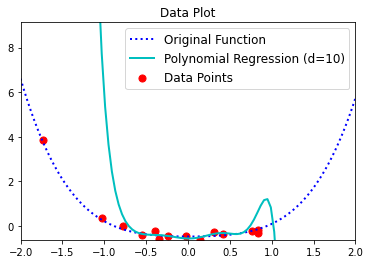

In [244]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

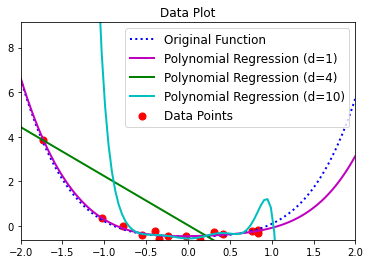

In [245]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!

The phenomenon is called overfitting